<a href="https://colab.research.google.com/github/salmaelgd/brain_tumor_classification/blob/main/Untitled48.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import MaxPooling2D
import os

In [ ]:
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
                                                    '/content/drive/MyDrive/archive (1)/Training',
                                                     target_size=(128, 128),
                                                     batch_size=5712,
                                                     class_mode='categorical'
                                                     #seed=123
                                                     )
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
                                                    '/content/drive/MyDrive/archive (1)/Testing',
                                                     target_size=(128, 128),
                                                     batch_size=1311,
                                                     class_mode='categorical'
                                                     #seed=123
                                                     )

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [ ]:
X_train, y_train = next(train_generator)
X_test, y_test = next(test_generator)

train_images shape:  (5712, 128, 128, 3)
train_labels shape:  (5712, 4)
test_images shape:  (1311, 128, 128, 3)
test_labels shape:  (1311, 4)


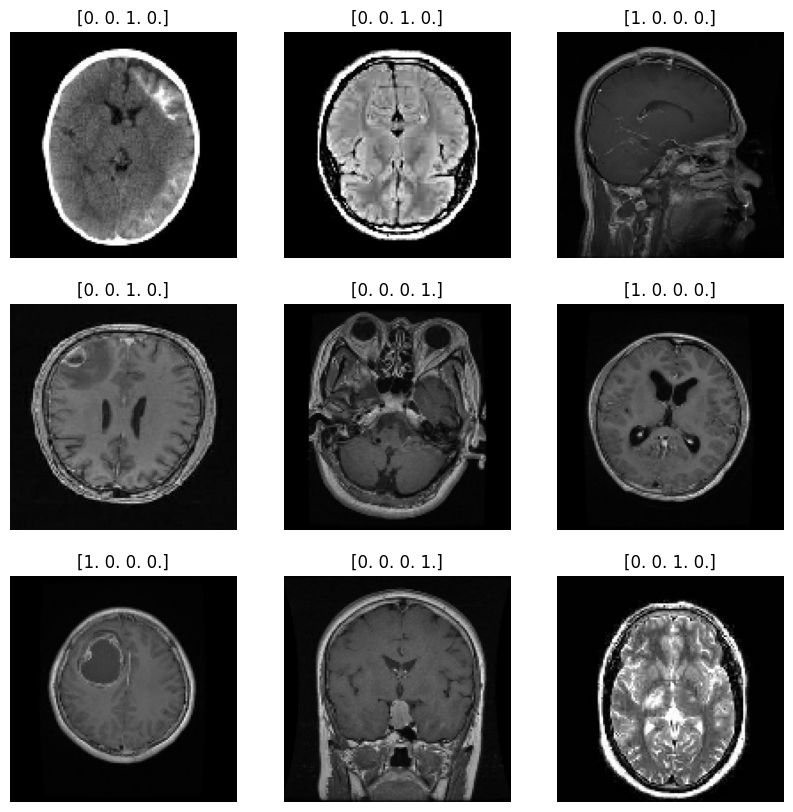

In [ ]:
print("train_images shape: ", X_train.shape)
print("train_labels shape: ", y_train.shape)
print("test_images shape: ", X_test.shape)
print("test_labels shape: ", y_test.shape)
fig = plt.figure(figsize=(10,10))

nrows=3
ncols=3
for i in range(9):
  fig.add_subplot(nrows, ncols, i+1)
  plt.imshow(X_train[i])
  plt.title("{}".format(y_train[i]))
  plt.axis(False)
plt.show()

In [ ]:
train_generator.class_indices

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

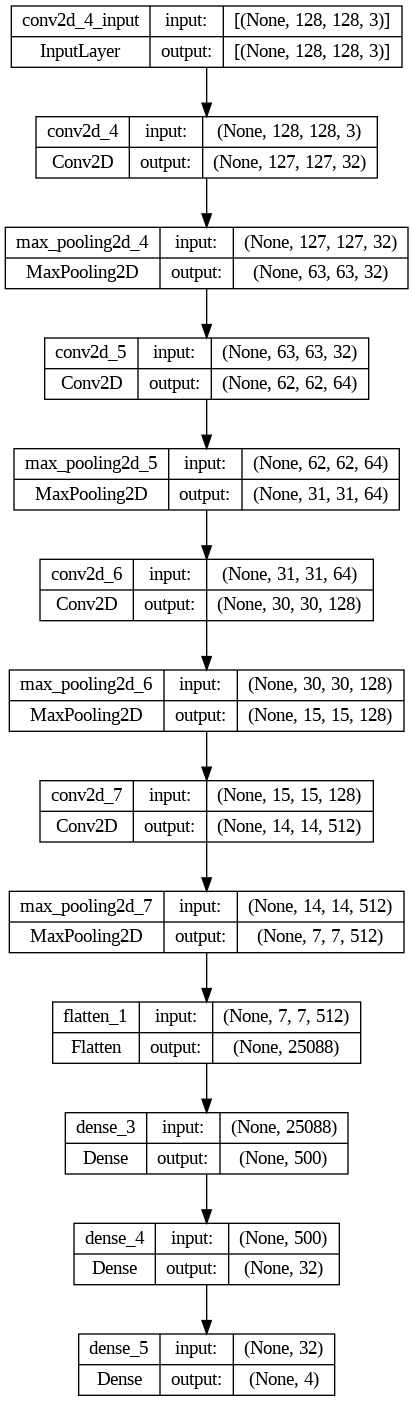

In [ ]:
from tensorflow.keras import layers
from keras.utils.vis_utils import plot_model
model=Sequential()

layers.Dropout(0.3)
model.add(Conv2D(filters=32,kernel_size=2,padding="valid",activation="relu",input_shape=(128,128,3)))
layers.BatchNormalization()
model.add(MaxPooling2D(pool_size=2))
layers.Dropout(0.3)
model.add(Conv2D(filters=64,kernel_size=2,padding="valid",activation ="relu"))
layers.BatchNormalization()
model.add(MaxPooling2D(pool_size=2))
layers.Dropout(0.3)
model.add(Conv2D(filters=128,kernel_size=2,padding="valid",activation="relu"))
layers.BatchNormalization()
model.add(MaxPooling2D(pool_size=2))
layers.Dropout(0.3)
model.add(Conv2D(filters=512,kernel_size=2,padding="valid",activation="relu"))
layers.BatchNormalization()
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
layers.Dropout(0.3)
model.add(Dense(500,activation="relu"))
layers.BatchNormalization()
layers.Dropout(0.3)
model.add(Dense(32,activation="relu"))
layers.BatchNormalization()
layers.Dropout(0.3)
model.add(Dense(4,activation="softmax"))

# Visualisation de l'architecture du modèle
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


In [ ]:

from keras import metrics
from keras import backend as K
def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_score = 2*((precision*recall)/(precision+recall+K.epsilon()))
    return f1_score
model.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy', metrics.Precision(), metrics.Recall(), f1_score])

In [ ]:
history=model.fit(
          X_train,
          y_train,
          epochs=20,
          batch_size=128)

Epoch 1/20
45/45 [==============================] - 18s 81ms/step - loss: 0.9585 - accuracy: 0.5664 - precision: 0.7357 - recall: 0.3708 - f1_score: 0.4445
Epoch 2/20
45/45 [==============================] - 3s 65ms/step - loss: 0.5328 - accuracy: 0.7885 - precision: 0.8168 - recall: 0.7539 - f1_score: 0.7844
Epoch 3/20
45/45 [==============================] - 3s 69ms/step - loss: 0.3988 - accuracy: 0.8473 - precision: 0.8632 - recall: 0.8274 - f1_score: 0.8451
Epoch 4/20
45/45 [==============================] - 3s 69ms/step - loss: 0.3321 - accuracy: 0.8736 - precision: 0.8839 - recall: 0.8599 - f1_score: 0.8712
Epoch 5/20
45/45 [==============================] - 3s 65ms/step - loss: 0.2766 - accuracy: 0.8979 - precision: 0.9058 - recall: 0.8869 - f1_score: 0.8963
Epoch 6/20
45/45 [==============================] - 3s 66ms/step - loss: 0.2101 - accuracy: 0.9195 - precision: 0.9242 - recall: 0.9153 - f1_score: 0.9200
Epoch 7/20
45/45 [==============================] - 3s 66ms/step - lo

In [ ]:
test_precision = model.evaluate(X_test,
     y_test
     )

41/41 [==============================] - 0s 10ms/step - loss: 0.1276 - accuracy: 0.9649 - precision: 0.9656 - recall: 0.9641 - f1_score: 0.9648


In [ ]:
test_recall = model.evaluate(X_test,
     y_test
     )

41/41 [==============================] - 0s 11ms/step - loss: 0.1276 - accuracy: 0.9649 - precision: 0.9656 - recall: 0.9641 - f1_score: 0.9648


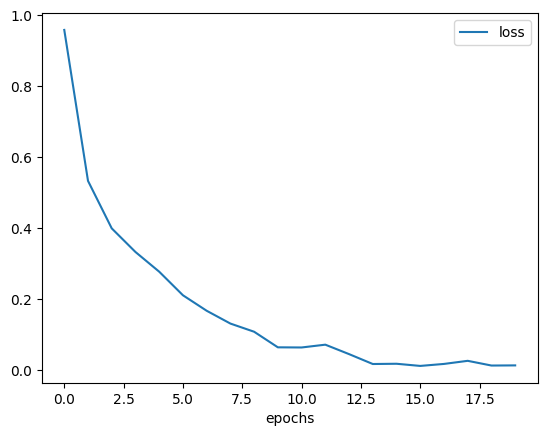

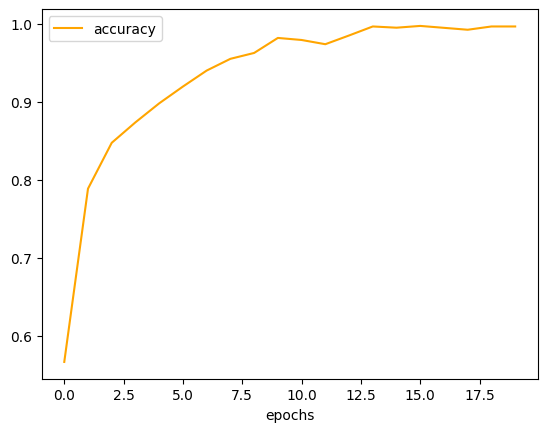

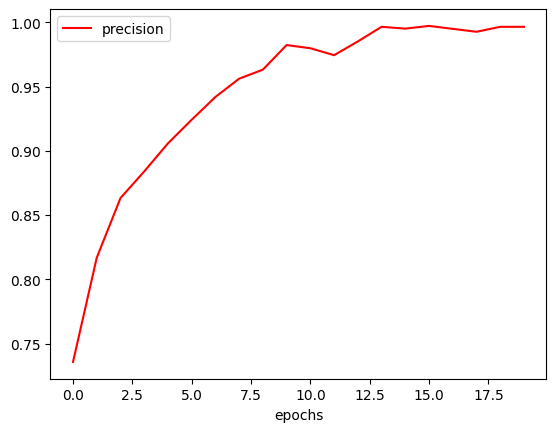

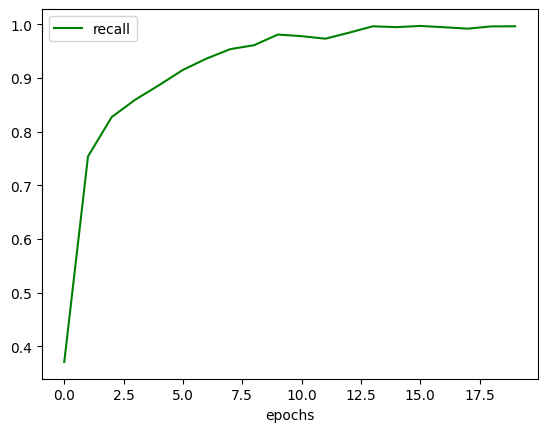

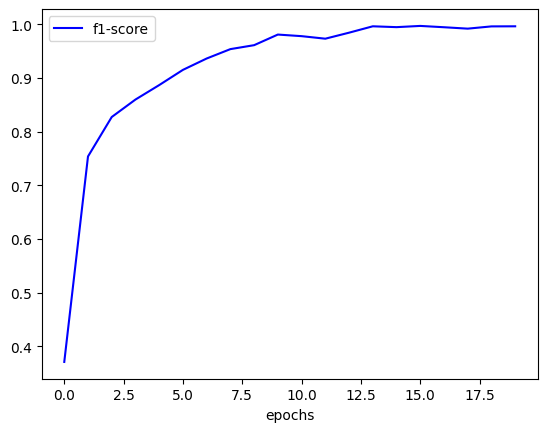

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.legend(['loss'])
plt.show()

plt.plot(history.history['accuracy'], color='orange')
plt.xlabel('epochs')
plt.legend(['accuracy'])
plt.show()

plt.plot(history.history['precision'], color='red')
plt.xlabel('epochs')
plt.legend(['precision'])
plt.show()

plt.plot(history.history['recall'], color='green')
plt.xlabel('epochs')
plt.legend(['recall'])
plt.show()

plt.plot(history.history['recall'], color='blue')
plt.xlabel('epochs')
plt.legend(['f1-score'])
plt.show()